<a href="https://colab.research.google.com/github/lovuinl/LiaVina/blob/main/10524615_2PA35_Lovina%20Arwena%20Amelia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

In [16]:
# Import dataset
data = pd.read_csv("https://gitlab.com/andreass.bayu/file-directory/-/raw/main/adult.csv")
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


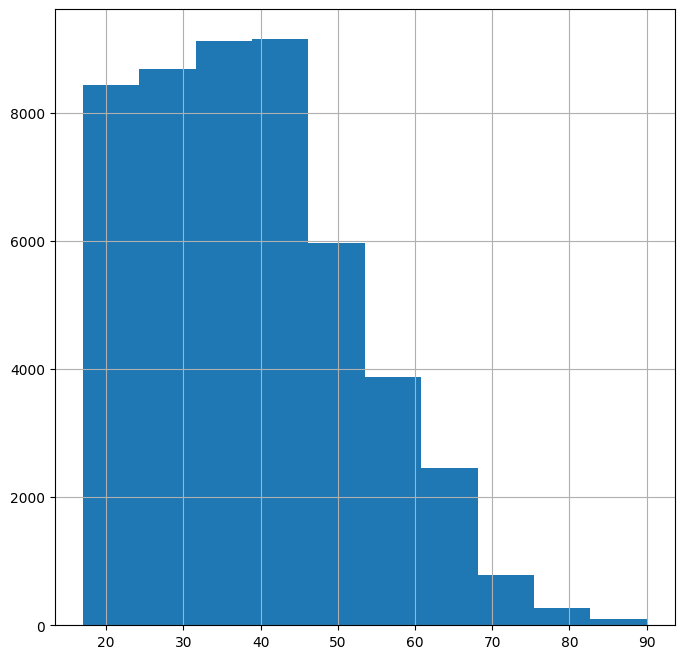

In [17]:
# Visualisasi HISTOGRAM
# Distribusi data dari kolom "Age"
data['age'].hist(figsize=(8,8))
plt.show()

In [18]:
data[data["age"]>70].shape

(868, 15)

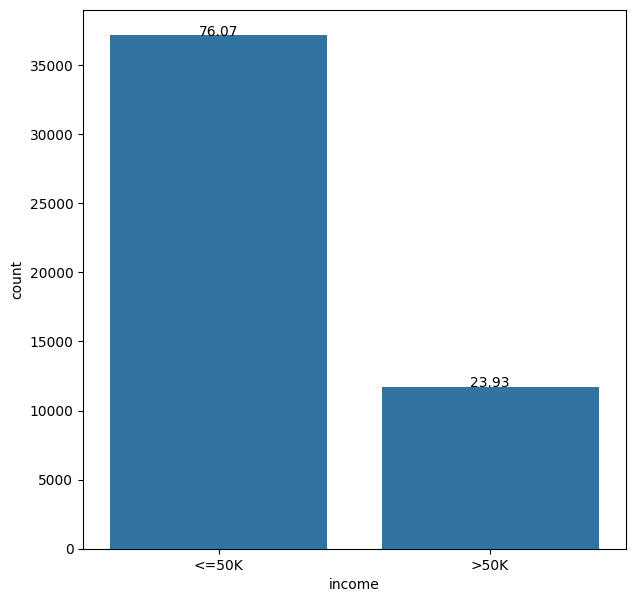

In [19]:
# Visualisasi BOXPLOT
# Distribusi data dari kolom "Income"
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.countplot(x="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
plt.show()

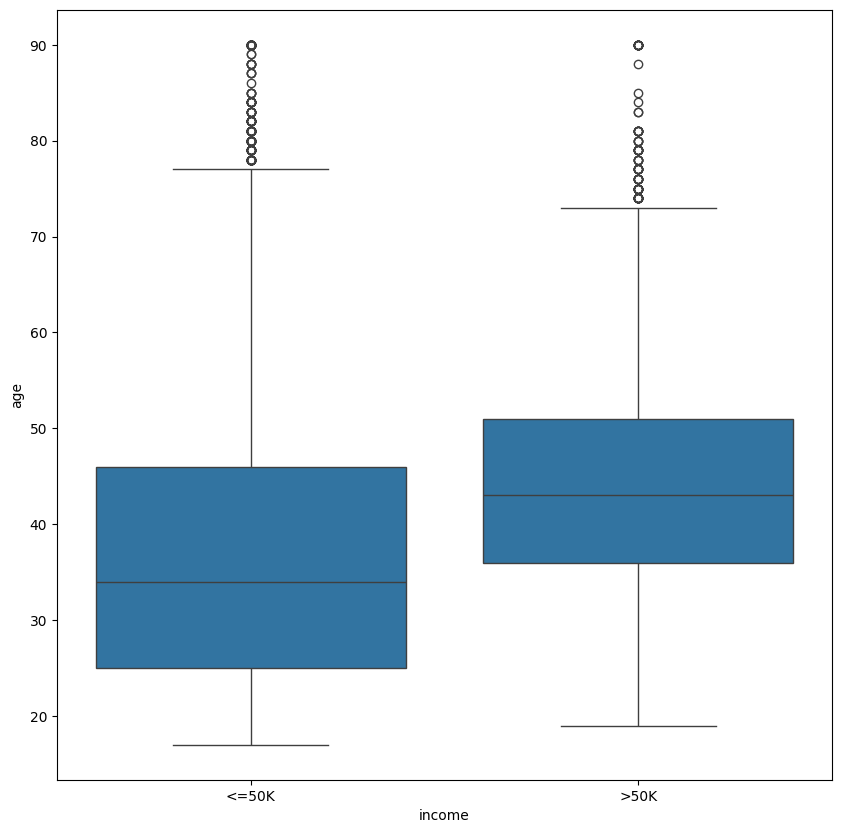

In [20]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="income", y="age", data=data)
plt.show()

In [21]:
data[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,>50K,44.275178
0,<=50K,36.872184


In [22]:
import random

data = data[(np.abs(stats.zscore(data["age"])) < 3)]

income_1 = data[data['income']=='<=50K']['age']
income_0 = data[data['income']=='>50K']['age']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

In [23]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("t-test:", ttest)
print("p-value:", pval)


if pval <0.05:
    print("Kesimpulan: Null hypothesis ditolak")
else:
    print("Kesimpulan: Null hypothesis diterima")

t-test: -2.4380689354185128
p-value: 0.015763304306618597
Kesimpulan: Null hypothesis ditolak


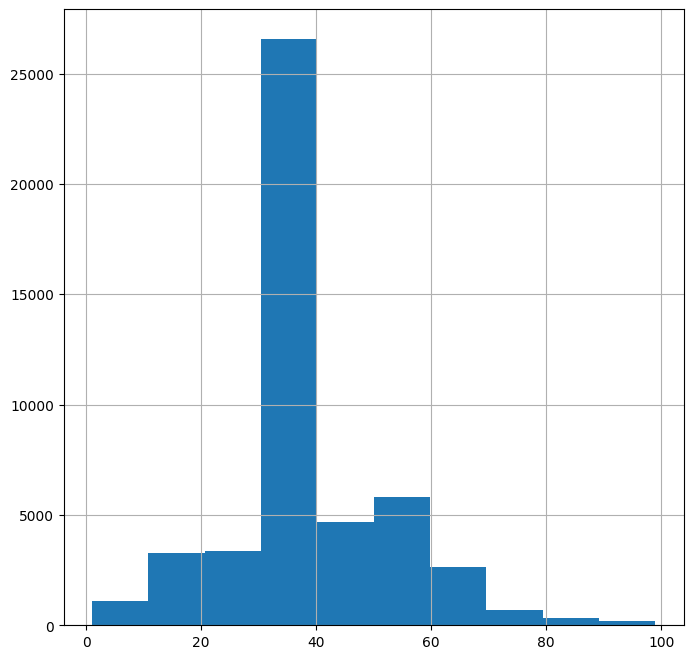

In [24]:
data['hours-per-week'].hist(figsize=(8,8))
plt.show()

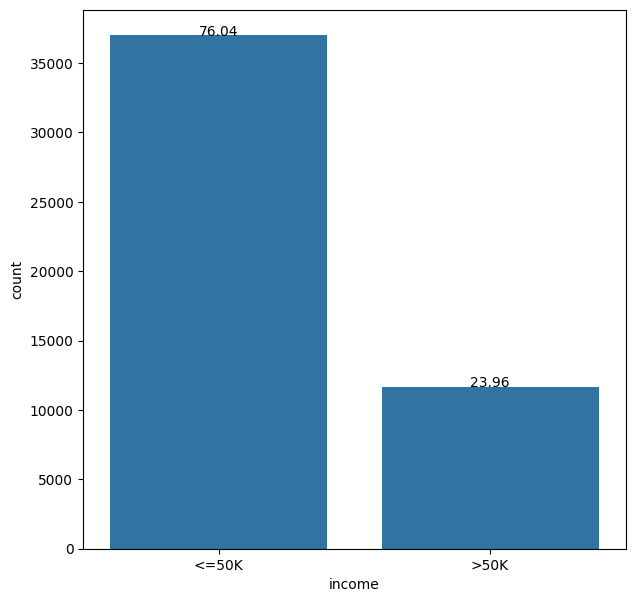

In [25]:
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.countplot(x="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
plt.show()

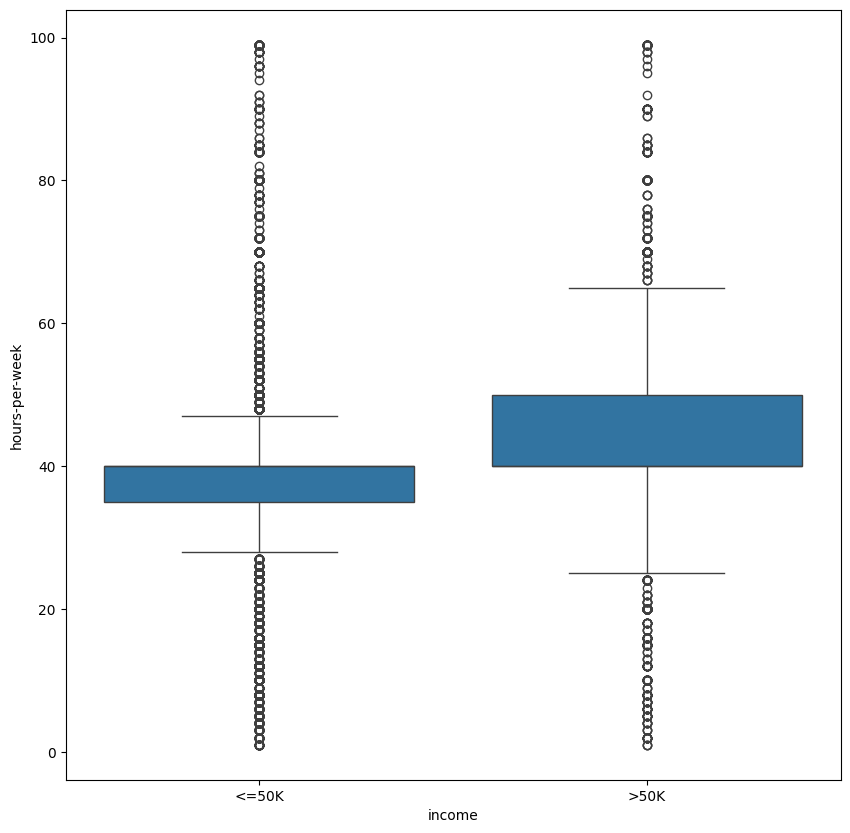

In [26]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="income", y="hours-per-week", data=data)
plt.show()

In [27]:
# Buat uji hipotesis untuk menentukan null atau alternate hypothesis.

import random

data = data[(np.abs(stats.zscore(data["hours-per-week"])) < 3)]

income_1 = data[data['income']=='<=50K']['hours-per-week']
income_0 = data[data['income']=='>50K']['hours-per-week']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("t-test:", ttest)
print("p-value:", pval)


if pval <0.05:
    print("Kesimpulan: Null hypothesis ditolak")
else:
    print("Kesimpulan: Null hypothesis diterima")

t-test: -2.566843883152992
p-value: 0.011100575624432178
Kesimpulan: Null hypothesis ditolak


# Kesimpulan
# Dari data diatas, dapat disimpulkan bahwa ada cukup bukti statistik untuk mendukung hipotesis alternatif H1, yang berarti terdapat hubungan atau perbedaan signifikan antara variabel yang diuji. Hal ini menunjukkan bahwa hasil yang diperoleh tidak hanya terjadi karena kebetulan acak dan lebih konsisten dengan keberadaan suatu efek, pengaruh, atau hubungan di populasi.